In [1]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import requests
import scipy
# import tensorflow as tf
# from sklearn.manifold import TSNE
import sompylib.sompy as SOM
from time import time
import random
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
#Adjacency graph
data_path = './paper/With_Karla/Data/'
EdgeList = pd.read_csv(data_path +'edge_node_20181031.csv',header=None)
print (EdgeList.shape)
EdgeList.head()

(121, 2)


0   1
0  54  64
1  55  63
2  49  57
3  43  51
4  37  45

In [3]:
import glob
import os
from shutil import copyfile

path = data_path + 'ML_181030/'
# path = './ML_data_nCr_58,2/'
all_options_names = []
counter = 1
all_options = pd.DataFrame()
for filename in glob.glob(os.path.join(path, '*.csv'))[:]:
    all_options_names.append(filename)
    DF = pd.read_csv(filename,header=None)
    all_options = pd.concat((all_options,DF),axis=0)
    print (all_options.shape)


len(all_options_names)

(12624, 469)
(24425, 469)
(37997, 469)
(50978, 469)
(62663, 469)
(75090, 469)
(87317, 469)
(101150, 469)
(113088, 469)
(126502, 469)
(139138, 469)
(151363, 469)
(165083, 469)
(178436, 469)
(190764, 469)


15

In [4]:
all_options.head()

0     1     2     3    4    5    6     7    8    9    ...         459  \
0   3.0  -8.0 -12.0  16.0  1.0  3.0  1.0 -46.0  0.8  1.0  ...    9.866256   
1  13.0 -19.0  -8.0  -1.0 -1.0 -9.0 -9.0  16.0  0.5  0.1  ...   50.270911   
2  15.0  -8.0   2.0 -21.0 -3.0  1.0  1.0  41.0  1.2  0.7  ...   42.886391   
3  -4.0  -7.0 -13.0  18.0 -4.0 -8.0 -6.0  24.0  0.6  0.8  ...   55.901318   
4   8.0 -13.0  17.0   1.0 -5.0  6.0 -1.0   4.0  1.3  1.0  ...   41.188088   

         460        461        462        463   464   465   466   467   468  
0  38.589790  38.589790  38.589817  38.589817  16.0 -12.0 -12.0 -46.0 -46.0  
1  23.902256  23.902256  29.295838  29.295838  -1.0  -8.0  -8.0  16.0  16.0  
2  16.484060  16.484060  36.384401  36.384401 -21.0   2.0   2.0  41.0  41.0  
3  44.282916  44.282916  40.966016  40.966016  18.0 -13.0 -13.0  24.0  24.0  
4  39.866268  39.866268  39.866235  39.866235   1.0  17.0  17.0   4.0   4.0  

[5 rows x 469 columns]

In [5]:
# The structure of each record is the following:
# ·        11 input values;
# ·        216 nodes coordinates (x,y,z);
# ·        121 lengths ;
# ·        121 force magnitudes.


In [6]:
ind_inputs  = [i for i in range(11)]
Design_inputs = all_options[ind_inputs].copy()
print ('inputs',Design_inputs.shape)
ind_coords  = [i for i in range(11,11+216)]
Coords = all_options[ind_coords].copy()
print ('Coords',Coords.shape)
ind_lengths  = [i for i in range(11+216,11+216+121)]
Lengths = all_options[ind_lengths].copy()
print ('Lengths',Lengths.shape)

ind_forces  = [i for i in range(11+216+121,11+216+121+121)]
Forces = all_options[ind_forces].copy()
print ('forces',Forces.shape)
# 


inputs (190764, 11)
Coords (190764, 216)
Lengths (190764, 121)
forces (190764, 121)


In [7]:
stat_force = np.abs(Forces).describe(percentiles=[.05,.1,.5,.9,.95,.99])
stat_length = Lengths.describe(percentiles=[.05,.1,.5,.9,.95,.99])
stat_length

227            228            229            230  \
count  190764.000000  190764.000000  190764.000000  190764.000000   
mean      145.304175     149.602790     143.002933     136.770483   
std        83.141520      84.780497      77.594868      70.429048   
min         1.369879       1.454044       1.227195       1.580932   
5%         29.005377      29.638271      30.524367      32.296419   
10%        41.787970      43.589714      44.701693      46.828826   
50%       136.576693     140.831242     135.765608     130.998772   
90%       261.144734     266.997875     249.825314     233.247439   
95%       295.669394     302.389615     282.104241     262.225159   
99%       358.236767     367.993759     341.332317     315.158834   
max       490.328475     511.699140     476.231333     440.201522   

                 231            232            233            234  \
count  190764.000000  190764.000000  190764.000000  190764.000000   
mean      130.946048     125.558689     120.669006     116.444941   
std        63.400502      56.693941      50.574980      45.349695   
min         1.210290       1.528087       1.552378       1.571989   
5%         34.641172      37.836949      41.928875      45.727429   
10%        49.738357      53.083681      55.835397      57.737566   
50%       126.446027     122.246411     118.367266     114.995090   
90%       217.302267     202.254495     188.674557     176.957409   
95%       242.736747     224.494137     207.663195     192.723458   
99%       289.744439     265.174420     241.915228     220.086735   
max       403.481364     365.977823     327.683298     288.717844   

                 235            236      ...             338       339  \
count  190764.000000  190764.000000      ...        190764.0  190764.0   
mean      113.202410     111.250991      ...             0.0       0.0   
std        41.277330      38.683814      ...             0.0       0.0   
min         2.434726      16.194875      ...             0.0       0.0   
5%         48.972378      51.320217      ...             0.0       0.0   
10%        58.757725      58.814608      ...             0.0       0.0   
50%       112.603968     111.146663      ...             0.0       0.0   
90%       168.295703     163.750060      ...             0.0       0.0   
95%       180.141585     171.295216      ...             0.0       0.0   
99%       200.390514     183.892723      ...             0.0       0.0   
max       249.341081     209.998740      ...             0.0       0.0   

            340       341       342           343            344  \
count  190764.0  190764.0  190764.0  1.907640e+05  190764.000000   
mean        0.0       0.0       0.0  1.480735e+01      13.600694   
std         0.0       0.0       0.0  2.982084e-11       3.055702   
min         0.0       0.0       0.0  1.480735e+01       8.824661   
5%          0.0       0.0       0.0  1.480735e+01       8.824661   
10%         0.0       0.0       0.0  1.480735e+01       9.533114   
50%         0.0       0.0       0.0  1.480735e+01      13.791282   
90%         0.0       0.0       0.0  1.480735e+01      17.556156   
95%         0.0       0.0       0.0  1.480735e+01      18.508028   
99%         0.0       0.0       0.0  1.480735e+01      18.508028   
max         0.0       0.0       0.0  1.480735e+01      18.508028   

                 345            346            347  
count  190764.000000  190764.000000  190764.000000  
mean       13.600694     196.374676     196.374676  
std         3.055702     138.286785     138.286785  
min         8.824661       0.026467       0.026467  
5%          8.824661      21.534441      21.534441  
10%         9.533114      35.297388      35.297388  
50%        13.791282     173.352917     173.352917  
90%        17.556156     394.834517     394.834517  
95%        18.508028     453.909117     453.909117  
99%        18.508028     555.993094     555.993094  
max        18.508028     701.189554     701.189554  

[11 rows x 121 c

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_abs_forces = scaler.fit_transform(np.abs(Forces.values))


In [9]:
force_abs_max = stat_force.loc['95%'].max()
force_abs_min = stat_force.loc['5%'].min()
scaled_abs_forces = (np.abs(Forces.values[:])-force_abs_min)/(force_abs_max-force_abs_min)
scaled_abs_forces[scaled_abs_forces>1]=1
scaled_abs_forces[scaled_abs_forces<0]=0

In [10]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(25,25))
# which = 1000
# for kk, f in enumerate(range(which,which+25)):
#     coords = Coords.values[f,:]
#     coords = coords.reshape(72,3)
#     ax = fig.add_subplot(5,5,kk+1, projection='3d') 
#     for edg_i,ege in enumerate(EdgeList.values[:]):
#         col = np.sign(Forces.values[f][edg_i])
#         line_width = scaled_abs_forces[f][edg_i]*6
#         ax.plot3D(coords[ege,0], coords[ege,1], coords[ege,2],'-',color=plt.cm.jet(col), linewidth=line_width, antialiased=True)
# #         ax.plot3D(coords[ege,0], coords[ege,1], coords[ege,2],'-',color=plt.cm.jet(ege[0]/72), linewidth=.7, antialiased=True)

#     ax.view_init(35,210)

# plt.tight_layout()
# plt.show()

In [11]:
Coords.shape

Xcoords = Coords.values[:,range(0,Coords.shape[1],3)]
Ycoords = Coords.values[:,range(1,Coords.shape[1],3)]
Zcoords = Coords.values[:,range(2,Coords.shape[1],3)]

LoadPaths_abs = np.multiply(np.abs(Forces.values[:]),Lengths.values[:])
LoadPaths = np.multiply(Forces.values[:],Lengths.values[:])

In [12]:
LoadPaths.shape

(190764, 121)

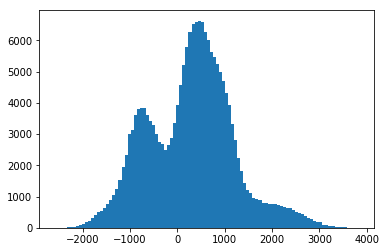

In [13]:
# Basic tests on the data
plt.hist(Forces.sum(axis=1),bins=100);

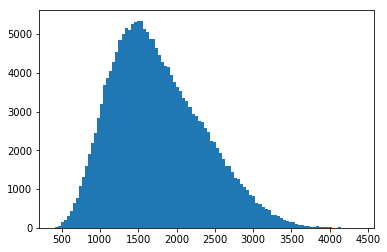

In [14]:
# number of non-zero qs
plt.hist(np.abs(Forces.values[:]).sum(axis=1),bins=100);

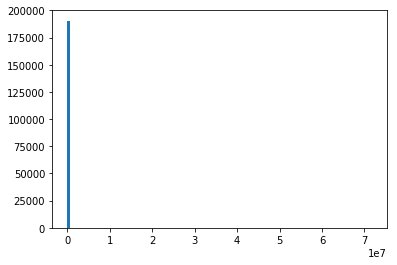

In [15]:
plt.hist(Lengths.sum(axis=1),bins=100);

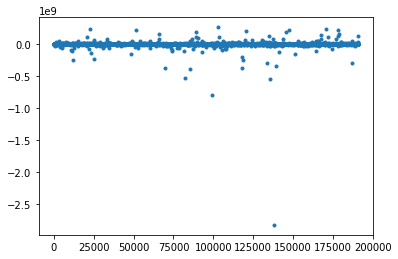

In [16]:
plt.plot(LoadPaths.sum(axis=1),'.');

In [18]:
DF = pd.DataFrame(data = LoadPaths.sum(axis=1))
stat_Loadpath =  DF.describe(percentiles=[.01,.05,.1,.2,.5,.7,.8,.9,.95,.99])
stat_Loadpath

0
count  1.907640e+05
mean  -5.021998e+04
std    7.687913e+06
min   -2.831988e+09
1%    -9.430215e+05
5%    -2.097243e+05
10%   -1.159293e+05
20%   -6.396011e+04
50%   -1.311251e+04
70%    2.988809e+02
80%    1.358453e+04
90%    7.068758e+04
95%    1.753118e+05
99%    9.585833e+05
max    2.623844e+08

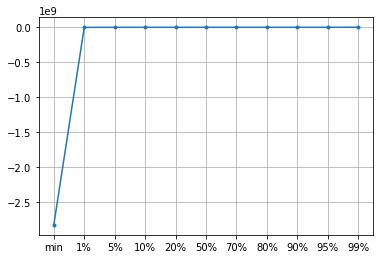

In [19]:
plt.plot(stat_Loadpath.values[3:-1],'.-');
ticks = list(stat_Loadpath.index.values[3:-1])
plt.xticks([i for i in range(len(ticks))],ticks)
plt.grid()

## Dimensionality reduction or clustering of  the experiments based on their force values
### We use a method called UMAP

In [ ]:
# import umap
# embedding = umap.UMAP(n_components=2).fit_transform(Forces.values[:])

### Statistical measures of our results (Higher order statistics)
### To see whether the identified patterns correlates with any of the possible statistical measures

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(25,25))
# which = 1000
# for kk, f in enumerate(range(which,which+25)):
#     coords = Coords.values[f,:]
#     coords = coords.reshape(72,3)
#     Xcoord = Xcoords[f,:]
#     Ycoord = Ycoords[f,:]
#     Zcoord = Zcoords[f,:]
#     ax = fig.add_subplot(5,5,kk+1, projection='3d') 
#     for edg_i,ege in enumerate(EdgeList.values[:]):
#         col = np.sign(Forces.values[f][edg_i])
#         line_width = scaled_abs_forces[f][edg_i]*6
#         ax.plot3D(Xcoord[ege], Ycoord[ege], Zcoord[ege],'-',color=plt.cm.jet(col), linewidth=line_width, antialiased=True)
# #         ax.plot3D(coords[ege,0], coords[ege,1], coords[ege,2],'-',color=plt.cm.jet(ege[0]/72), linewidth=.7, antialiased=True)

#     ax.view_init(35,210)

# plt.tight_layout()
# plt.show()

In [20]:
from scipy.stats import kurtosis
from scipy.stats import skew



#mean of Forces
mean_Forces  =  Forces.mean(axis=1)
# mean of abs(Forces)
mean_abs_Forces  =  np.abs(Forces.values[:]).mean(axis=1)
#variance of Forces
std_Forces = Forces.std(axis=1)
#variance of absolute Forces
std_abs_Forces = np.abs(Forces.std(axis=1))
#Skewness Forces
skw_Forces = skew(Forces.values[:],axis=1)
#Skewness of absolute Forces
skw_abs_Forces = np.abs(skew(Forces.values[:],axis=1))
#Kurtosis of Forces
kurt_Forces = kurtosis(Forces.values[:],axis=1)
#Kurtosis of absolute Forces
kurt_abs_Forces = kurtosis(np.abs(Forces.values[:]),axis=1)







#mean of Lengths
mean_Lengths  =  Lengths.mean(axis=1)
#variance of Lengths
std_Lengths = Lengths.std(axis=1)
#Skewness Lengths
skw_Lengths = skew(Lengths.values[:],axis=1)
#Kurtosis of Lengths
kurt_Lengths = kurtosis(Lengths.values[:],axis=1)



#mean of LoadPaths
mean_LoadPaths  =  LoadPaths.mean(axis=1)
# mean of abs(LoadPaths)
mean_abs_LoadPaths  =  np.abs(LoadPaths).mean(axis=1)
#variance of LoadPaths
std_LoadPaths = LoadPaths.std(axis=1)
#variance of absolute LoadPaths
std_abs_LoadPaths = np.abs(LoadPaths.std(axis=1))
#Skewness LoadPaths
skw_LoadPaths = skew(LoadPaths,axis=1)
#Skewness of absolute LoadPaths
skw_abs_LoadPaths = np.abs(skew(LoadPaths,axis=1))
#Kurtosis of LoadPaths
kurt_LoadPaths = kurtosis(LoadPaths,axis=1)
#Kurtosis of absolute LoadPaths
kurt_abs_LoadPaths = kurtosis(np.abs(LoadPaths),axis=1)


#mean of LoadPaths_abs
mean_LoadPaths_abs  =  LoadPaths_abs.mean(axis=1)
# mean of abs(LoadPaths_abs)
mean_abs_LoadPaths_abs  =  np.abs(LoadPaths_abs).mean(axis=1)
#variance of LoadPaths_abs
std_LoadPaths_abs = LoadPaths_abs.std(axis=1)
#variance of absolute LoadPaths_abs
std_abs_LoadPaths_abs = np.abs(LoadPaths_abs.std(axis=1))
#Skewness LoadPaths_abs
skw_LoadPaths_abs = skew(LoadPaths_abs,axis=1)
#Skewness of absolute LoadPaths_abs
skw_abs_LoadPaths_abs = np.abs(skew(LoadPaths_abs,axis=1))
#Kurtosis of LoadPaths_abs
kurt_LoadPaths_abs = kurtosis(LoadPaths_abs,axis=1)
#Kurtosis of absolute LoadPaths_abs
kurt_abs_LoadPaths_abs = kurtosis(np.abs(LoadPaths_abs),axis=1)





#mean of Xcoords
mean_Xcoords  =  Xcoords.mean(axis=1)
# mean of abs(Coords)
mean_abs_Xcoords  =  np.abs(Xcoords).mean(axis=1)
#variance of Coords
std_Xcoords = Xcoords.std(axis=1)
#variance of absolute Coords
std_abs_Xcoords = np.abs(Xcoords.std(axis=1))
#Skewness Coords
skw_Xcoords = skew(Xcoords,axis=1)
#Skewness of absolute Coords
skw_abs_Xcoords = np.abs(skew(Xcoords,axis=1))
#Kurtosis of Coords
kurt_Xcoords = kurtosis(Xcoords,axis=1)
#Kurtosis of absolute Coords
kurt_abs_Xcoords = kurtosis(np.abs(Xcoords),axis=1)



#mean of Ycoords
mean_Ycoords  =  Ycoords.mean(axis=1)
# mean of abs(Coords)
mean_abs_Ycoords =  np.abs(Ycoords).mean(axis=1)
#variance of Coords
std_Ycoords = Ycoords.std(axis=1)
#variance of absolute Coords
std_abs_Ycoords = np.abs(Ycoords.std(axis=1))
#Skewness Coords
skw_Ycoords = skew(Ycoords,axis=1)
#Skewness of absolute Coords
skw_abs_Ycoords = np.abs(skew(Ycoords,axis=1))
#Kurtosis of Coords
kurt_Ycoords = kurtosis(Ycoords,axis=1)
#Kurtosis of absolute Coords
kurt_abs_Ycoords = kurtosis(np.abs(Ycoords),axis=1)


#mean of Ycoords
mean_Zcoords  =  Zcoords.mean(axis=1)
# mean of abs(Coords)
mean_abs_Zcoords =  np.abs(Zcoords).mean(axis=1)
#variance of Coords
std_Zcoords = Zcoords.std(axis=1)
#variance of absolute Coords
std_abs_Zcoords = np.abs(Zcoords.std(axis=1))
#Skewness Coords
skw_Zcoords = skew(Zcoords,axis=1)
#Skewness of absolute Coords
skw_abs_Zcoords = np.abs(skew(Zcoords,axis=1))
#Kurtosis of Coords
kurt_Zcoords = kurtosis(Zcoords,axis=1)
#Kurtosis of absolute Coords
kurt_abs_Zcoords = kurtosis(np.abs(Zcoords),axis=1)




### Correlations between different analytics

In [21]:
DF_analytics = pd.DataFrame()
DF_analytics['mean_Forces'] = mean_Forces
DF_analytics['mean_abs_Forces'] = mean_abs_Forces
DF_analytics['std_Forces'] = std_Forces
DF_analytics['std_abs_Forces'] = std_abs_Forces
DF_analytics['skw_Forces'] = skw_Forces
DF_analytics['skw_abs_Forces'] = skw_abs_Forces
DF_analytics['kurt_Forces']=kurt_Forces
DF_analytics['kurt_abs_Forces'] = kurt_abs_Forces




DF_analytics['mean_Lengths'] = mean_Lengths
DF_analytics['std_Lengths'] = std_Lengths
DF_analytics['skw_Lengths'] = skw_Lengths
DF_analytics['kurt_Lengths'] = kurt_Lengths


DF_analytics['mean_LoadPaths'] = mean_LoadPaths
# DF_analytics['mean_abs_LoadPaths'] = mean_abs_LoadPaths
DF_analytics['std_LoadPaths'] = std_LoadPaths
# DF_analytics['std_abs_LoadPaths'] = std_abs_LoadPaths
DF_analytics['skw_LoadPaths'] = skw_LoadPaths
# DF_analytics['skw_abs_LoadPaths'] = skw_abs_LoadPaths
DF_analytics['kurt_LoadPaths']=kurt_LoadPaths
# DF_analytics['kurt_abs_LoadPaths'] = kurt_abs_LoadPaths


DF_analytics['mean_LoadPaths_abs'] = mean_LoadPaths_abs
# DF_analytics['mean_abs_LoadPaths_abs'] = mean_abs_LoadPaths_abs
DF_analytics['std_LoadPaths_abs'] = std_LoadPaths_abs
# DF_analytics['std_abs_LoadPaths_abs'] = std_abs_LoadPaths_abs
DF_analytics['skw_LoadPaths_abs'] = skw_LoadPaths_abs
# DF_analytics['skw_abs_LoadPaths_abs'] = skw_abs_LoadPaths_abs
DF_analytics['kurt_LoadPaths_abs']=kurt_LoadPaths_abs
# DF_analytics['kurt_abs_LoadPaths_abs'] = kurt_abs_LoadPaths_abs


# # DF_analytics['mean_Xcoords'] = mean_Xcoords
# # DF_analytics['mean_abs_Xcoords'] = mean_abs_Xcoords
# DF_analytics['std_Xcoords'] = std_Xcoords
# # DF_analytics['std_abs_Xcoords'] = std_abs_Xcoords
# DF_analytics['skw_Xcoords'] = skw_Xcoords
# # DF_analytics['skw_abs_Xcoords'] = skw_abs_Xcoords
# DF_analytics['kurt_Xcoords'] = kurt_Xcoords
# # DF_analytics['kurt_abs_Xcoords'] = kurt_abs_Xcoords

# # DF_analytics['mean_Ycoords'] = mean_Ycoords
# # DF_analytics['mean_abs_Ycoords'] = mean_abs_Ycoords
# DF_analytics['std_Ycoords'] = std_Ycoords
# # DF_analytics['std_abs_Ycoords'] = std_abs_Ycoords
# DF_analytics['skw_Ycoords'] = skw_Ycoords
# # DF_analytics['skw_abs_Ycoords'] = skw_abs_Ycoords
# DF_analytics['kurt_Ycoords'] = kurt_Ycoords
# # DF_analytics['kurt_abs_Ycoords'] = kurt_abs_Ycoords

# DF_analytics['mean_Zcoords'] = mean_Zcoords
# # DF_analytics['mean_abs_Zcoords'] = mean_abs_Zcoords
# DF_analytics['std_Zcoords'] = std_Zcoords
# # DF_analytics['std_abs_Zcoords'] = std_abs_Zcoords
# DF_analytics['skw_Zcoords'] = skw_Zcoords
# # DF_analytics['skw_abs_Zcoords'] = skw_abs_Zcoords
# DF_analytics['kurt_Zcoords'] = kurt_Zcoords
# # DF_analytics['kurt_abs_Zcoords'] = kurt_abs_Zcoords


DF_analytics.head()

mean_Forces  mean_abs_Forces  std_Forces  std_abs_Forces  skw_Forces  \
0     1.306546        10.951737   15.424476       15.424476   -0.650530   
1     2.153678         8.863011   13.474209       13.474209    1.222843   
2     0.462734        14.779639   20.318496       20.318496   -0.176400   
3   -11.697813        19.302823   21.733611       21.733611    1.235183   
4     5.193001        18.936106   24.046367       24.046367   -0.125475   

   skw_abs_Forces  kurt_Forces  kurt_abs_Forces  mean_Lengths  std_Lengths  \
0        0.650530     1.646032         2.051437     69.935810   102.085038   
1        1.222843     4.020378         6.622903     77.794855    97.663779   
2        0.176400    -0.004011        -0.699949     68.323075   107.750986   
3        1.235183     2.136027        -0.718743     45.014558    52.282640   
4        0.125475    -0.548306        -1.370884     80.470401    86.839373   

   skw_Lengths  kurt_Lengths  mean_LoadPaths  std_LoadPaths  skw_LoadPaths  \
0     2.122479      4.473849     -582.528548    2766.177882      -4.313776   
1     1.725909      2.913721       78.640664    3035.483292       6.640311   
2     3.755860     18.350756      255.663912    4109.425392       6.248041   
3     0.902754     -0.365311      -91.720126    1101.200768       4.870817   
4     0.577472     -1.138150     -169.638704    1545.414516       3.430288   

   kurt_LoadPaths  mean_LoadPaths_abs  std_LoadPaths_abs  skw_LoadPaths_abs  \
0       17.140118          729.848464        2731.007288           4.328475   
1       46.959514          761.507945        2939.464036           6.783413   
2       44.611684          974.498830        4000.386621           6.638963   
3       25.078454          462.618886        1003.513567           4.906057   
4       24.281309          734.131873        1370.450185           4.910479   

   kurt_LoadPaths_abs  
0           17.243845  
1           47.164805  
2           44.947538  
3           25.054557  
4           26.471165

In [ ]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(DF_analytics, alpha=0.2, figsize=(12, 12), diagonal='kde');

In [22]:
corrmatrix  = pd.DataFrame(data=np.corrcoef(DF_analytics.values[:].T),index=DF_analytics.columns,columns=DF_analytics.columns)
corrmatrix

mean_Forces  mean_abs_Forces  std_Forces  std_abs_Forces  \
mean_Forces            1.000000         0.220340    0.094966        0.094966   
mean_abs_Forces        0.220340         1.000000    0.929988        0.929988   
std_Forces             0.094966         0.929988    1.000000        1.000000   
std_abs_Forces         0.094966         0.929988    1.000000        1.000000   
skw_Forces            -0.374223         0.168041    0.215344        0.215344   
skw_abs_Forces        -0.039070        -0.050470   -0.028029       -0.028029   
kurt_Forces            0.072140        -0.080453    0.066231        0.066231   
kurt_abs_Forces       -0.010271        -0.114167    0.113949        0.113949   
mean_Lengths           0.011068         0.008887    0.006648        0.006648   
std_Lengths            0.007648         0.006565    0.004776        0.004776   
skw_Lengths            0.101552        -0.004216    0.026767        0.026767   
kurt_Lengths           0.064608        -0.047748   -0.028359       -0.028359   
mean_LoadPaths         0.001189        -0.002900   -0.003588       -0.003588   
std_LoadPaths          0.012569         0.014149    0.013254        0.013254   
skw_LoadPaths         -0.071768         0.135532    0.080880        0.080880   
kurt_LoadPaths         0.028648         0.158701    0.181142        0.181142   
mean_LoadPaths_abs     0.014868         0.017238    0.016271        0.016271   
std_LoadPaths_abs      0.012532         0.014077    0.013189        0.013189   
skw_LoadPaths_abs      0.026232         0.160693    0.188094        0.188094   
kurt_LoadPaths_abs    -0.000559         0.140966    0.155878        0.155878   

                    skw_Forces  skw_abs_Forces  kurt_Forces  kurt_abs_Forces  \
mean_Forces          -0.374223       -0.039070     0.072140        -0.010271   
mean_abs_Forces       0.168041       -0.050470    -0.080453        -0.114167   
std_Forces            0.215344       -0.028029     0.066231         0.113949   
std_abs_Forces        0.215344       -0.028029     0.066231         0.113949   
skw_Forces            1.000000        0.093000    -0.085397         0.073427   
skw_abs_Forces        0.093000        1.000000     0.472516         0.264741   
kurt_Forces          -0.085397        0.472516     1.000000         0.832424   
kurt_abs_Forces       0.073427        0.264741     0.832424         1.000000   
mean_Lengths         -0.002387        0.003104     0.005025         0.003803   
std_Lengths          -0.001290        0.001188     0.002873         0.002686   
skw_Lengths          -0.046705        0.044620     0.081456         0.145561   
kurt_Lengths         -0.039642        0.026287     0.036602         0.088021   
mean_LoadPaths        0.015072        0.004010    -0.008043        -0.002058   
std_LoadPaths        -0.000151        0.004380     0.008873         0.008617   
skw_LoadPaths         0.303769        0.045582    -0.240579        -0.205996   
kurt_LoadPaths        0.128075        0.053254     0.092978         0.120963   
mean_LoadPaths_abs   -0.000462        0.005764     0.010520         0.010039   
std_LoadPaths_abs    -0.000124        0.004387     0.008865         0.008619   
skw_LoadPaths_abs     0.120916        0.049965     0.097297         0.135537   
kurt_LoadPaths_abs    0.134013        0.032925     0.049887         0.092653   

                    mean_Lengths  std_Lengths  skw_Lengths  kurt_Lengths  \
mean_Forces             0.011068     0.007648     0.101552      0.064608   
mean_abs_Forces         0.008887     0.006565    -0.004216     -0.047748   
std_Forces              0.006648     0.004776     0.026767     -0.028359   
std_abs_Forces          0.006648     0.004776     0.026767     -0.028359   
skw_Forces             -0.002387    -0.001290    -0.046705     -0.039642   
skw_abs_Forces          0.003104     0.001188     0.044620      0.026287   
kurt_Forces             0.005025     0.002873     0.081456      0.036602   
kurt_abs_Forces         0.003803     0.002686     

### It is interesting to see that the current obj function is just minimizing the mean_abs of qs.
### This can justify to add other momentums in to the objective function?!
### Also look at other correlations. They are all meaningful
### Next we can cluster the results based on other analytics

## Cluster the results based on analytics measure

## We can do similar mapping with SOM
### But then it is easier to visualize the structures

In [23]:
HOS_stat = DF_analytics.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])
HOS_stat['mean_LoadPaths_abs']

count    1.907640e+05
mean     2.527430e+03
std      6.731539e+04
min      4.651973e+01
10%      3.338918e+02
20%      4.407671e+02
30%      5.430241e+02
40%      6.501891e+02
50%      7.706796e+02
60%      9.214584e+02
70%      1.130133e+03
80%      1.486478e+03
90%      2.475930e+03
95%      4.346816e+03
99%      1.900498e+04
max      2.342734e+07
Name: mean_LoadPaths_abs, dtype: float64

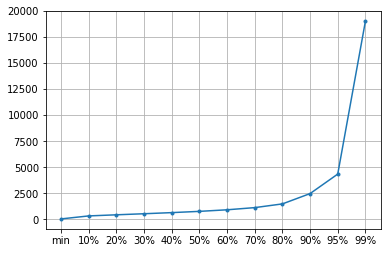

In [24]:
plt.plot(HOS_stat['mean_LoadPaths_abs'].values[3:-1],'.-');
ticks = list(HOS_stat.index.values[3:-1])
plt.xticks([i for i in range(len(ticks))],ticks)
plt.grid()

In [196]:
ind_sel = DF_analytics['mean_LoadPaths_abs']<HOS_stat['mean_LoadPaths_abs'].loc['20%']
print (DF_analytics.shape)
X = DF_analytics.values[ind_sel].astype(float)
# X = np.concatenate((Lengths.values[:].astype(float),Coords.values[:].astype(float)),axis=1)
# X = Lengths.values[ind_sel].astype(float)
std_x = np.std(X,axis=0)
print (X.shape)
X = X[:,std_x>0]
print (X.shape)

(190764, 20)
(38153, 20)
(38153, 20)


In [197]:
Coords_sel = Coords.values[ind_sel]
Forces_sel = Forces.values[ind_sel]
Lengths_sel = Lengths.values[ind_sel]
scaled_abs_forces_sel = scaled_abs_forces[ind_sel]
Design_inputs_sel = Design_inputs[ind_sel]

In [198]:



###############
# For this we need a proper data set as csv
###############


import sompylib.sompy as SOM
msz10 = 50
msz11 =50


# X = DF_analytics.values[:].astype(float)

print (X.shape)
som = SOM.SOM('', X[:], mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som.train(n_job = 1, shared_memory = 'no',verbose='final')
som.compname=[DF_analytics.columns.values[:]]

(38153, 20)
Total time elapsed: 4.163000 secodns
final quantization error: 1.992036


In [199]:
dists,bmus = som.find_K_nodes(som.data_raw,K=1)


(2480,) 2500


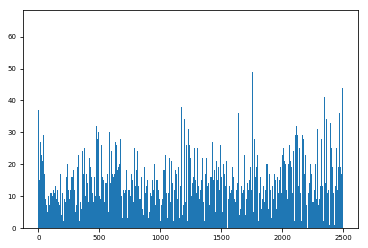

In [200]:
# bmus = som.project_data(som.data_raw)
print (np.unique(bmus).shape, som.nnodes)
plt.hist(bmus,bins=som.nnodes);


In [201]:
# som.ind_to_xy(bmus)

In [202]:
# som.hit_map()

In [203]:
# U = som.view_U_matrix(distance2=2, row_normalized='No', show_data='Yes', contooor='Yes', blob='No', save='No', save_dir='')

In [204]:
def show_node(ind=0):
    
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    
    
    node_n = ind_sel_nodes[ind]
    print ('node number: ',node_n)
    
    cases = np.argwhere(bmus==node_n)[:,0]    
    K = len(cases)
    if K>=1:
        #Sort within each cluster
        DF_tmp = pd.DataFrame()
        DF_tmp['data_inds'] = cases
        DF_tmp['dists'] = dists[cases]
        data_inds = DF_tmp.sort_values('dists')['data_inds'].copy().values[:]
#         data_inds = cases
        fig = plt.figure(figsize=(7,7))
        for f in range(9):
            try:
                data_ind = data_inds[f]
                coords = Coords_sel[data_ind,:]
                coords = coords.reshape(72,3)
                ax = fig.add_subplot(3,3,f+1, projection='3d') 
                ax.view_init(45,200)
#                 plt.axis('off')
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_zticks([])

                for edg_i, ege in enumerate(EdgeList.values[:]):

                    col = np.sign(Forces_sel[data_ind][edg_i])
                    line_width = scaled_abs_forces_sel[data_ind][edg_i]*3
                    ax.plot3D(coords[ege,0], coords[ege,1], coords[ege,2],'-',color=plt.cm.jet(col), linewidth=line_width, antialiased=True)
            except:
                pass

#         plt.tight_layout(h_pad=.0001, w_pad=.0001 )
        plt.tight_layout( )
    else:
        print ('not enough data for this node')

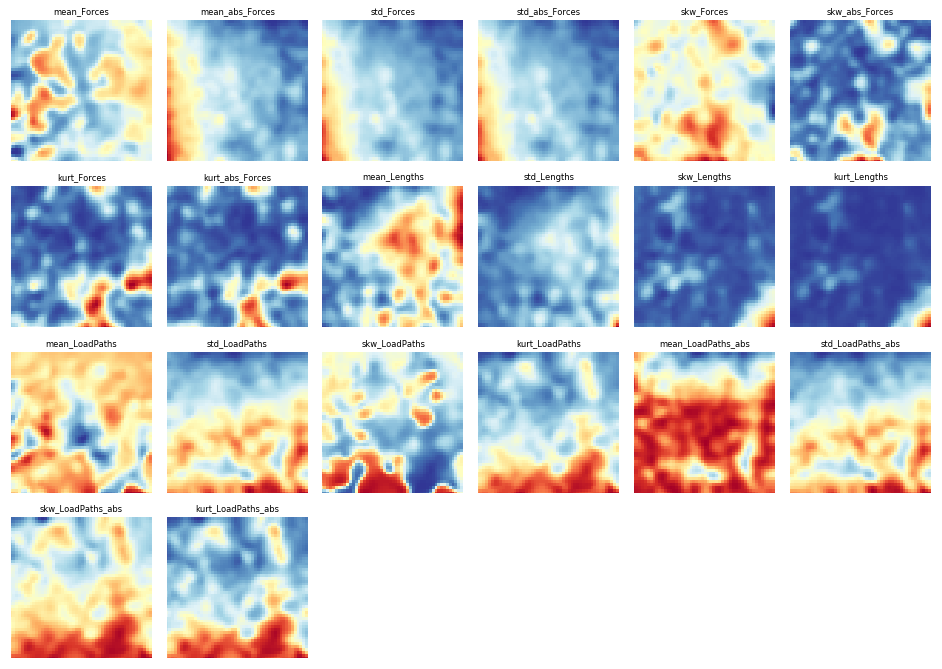

In [205]:
if X.shape[1]>35:
    pass
else:
    som.view_map(text_size=7)

In [206]:
som_stat

mean_Forces mean_abs_Forces   std_Forces std_abs_Forces   skw_Forces  \
count  2500.000000     2500.000000  2500.000000    2500.000000  2500.000000   
mean      2.338711       14.485377    18.170633      18.170633     0.043762   
std       2.799324        4.275872     5.488341       5.488341     0.260772   
min      -1.798677        6.694903     7.797785       7.797785    -0.943577   
5%       -0.926150        8.606768    10.279800      10.279800    -0.509860   
10%      -0.559831        9.489786    11.520556      11.520556    -0.329296   
20%      -0.126661       10.820666    13.659390      13.659390    -0.129731   
30%       0.244738       11.688768    14.925941      14.925941    -0.004908   
40%       1.210386       12.313792    15.865263      15.865263     0.059995   
50%       1.856895       13.539326    16.866495      16.866495     0.111187   
60%       2.536920       15.146112    18.780632      18.780632     0.151696   
70%       3.465197       16.769590    20.976168      20.976168     0.187501   
80%       4.253795       18.423205    23.178599      23.178599     0.238185   
90%       5.566194       20.688367    25.775233      25.775233     0.282380   
95%       8.711136       22.295881    28.099347      28.099347     0.310748   
99%      10.790192       25.236437    32.740146      32.740146     0.579913   
max      11.256173       26.300115    34.520288      34.520288     0.677059   

      skw_abs_Forces  kurt_Forces kurt_abs_Forces mean_Lengths  std_Lengths  \
count    2500.000000  2500.000000     2500.000000  2500.000000  2500.000000   
mean        0.440293     1.183866        0.572818    74.257887   113.661449   
std         0.125535     1.020332        0.919153    15.958561    64.158767   
min         0.233171    -0.476901       -0.963206    49.930664    59.109997   
5%          0.285351    -0.199674       -0.687032    55.984957    64.944652   
10%         0.309560    -0.018804       -0.538939    58.417782    69.472348   
20%         0.352955     0.269866       -0.374201    62.033641    74.159409   
30%         0.376653     0.507556       -0.188802    64.219633    77.781757   
40%         0.398709     0.878399        0.217493    65.736763    80.338250   
50%         0.420493     1.163363        0.692561    69.282442    86.565394   
60%         0.444539     1.392534        0.925825    74.273125    98.785043   
70%         0.467309     1.589375        1.071086    79.704980   118.411813   
80%         0.489975     1.761956        1.253177    86.494259   144.771740   
90%         0.587373     2.367316        1.655318    96.742457   194.012319   
95%         0.693437     3.183397        2.205293   102.069244   237.327780   
99%         0.914572     4.576370        3.113249   126.662230   351.990560   
max         1.025714     4.921074        3.365613   158.282764   603.243010   

       skw_Lengths kurt_Lengths mean_LoadPaths std_LoadPaths skw_LoadPaths  \
count  2500.000000  2500.000000    2500.000000   2500.000000   2500.000000   
mean      2.069714     5.905152    -151.209499   2969.093840     -1.376134   
std       1.066831     6.828708     347.710717   2077.715009      2.085675   
min       0.970230     0.027492    -898.744341    493.706832     -4.879604   
5%        1.128294     0.690335    -781.158766    807.094599     -3.933187   
10%       1.198912     1.013326    -625.177726    982.031023     -3.814047   
20%       1.281580     1.328293    -382.441673   1249.725865     -3.397859   
30%       1.318036     1.498572    -207.029537   1501.596550     -2.875960   
40%       1.397183     1.834178    -128.102982   1749.556328     -2.315573   
50%       1.539668     2.551702     -98.951509   2103.323530     -1.790407   
60%       1.857160     4.140956     -81.520615   2700.339767     -1.036876   
70%       2.387630     6.881637     -60.984278   3693.462066     -0.139956   
80%       2.946910    10.187581     -39.047565   4962.288176      0.443025   
90%       3.686202    15.306687      57.324866   6379.119757      1.4

In [207]:
def query_nodes(what='mean_abs_Forces',smallerorlarger='smaller',percent='5%',plot='Yes'):
    # Those nodes 
    codebooks = SOM.denormalize_by(som.data_raw,som.codebook)
    DF_som = pd.DataFrame(data=codebooks,columns=som.compname)

    som_stat = DF_som.describe(percentiles=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])
    if smallerorlarger== 'smaller':
        ind_sel_nodes = DF_som[what] < som_stat[what].loc[percent]
    if smallerorlarger== 'larger':
        ind_sel_nodes = DF_som[what] > som_stat[what].loc[percent]
    ind_sel_nodes = ind_sel_nodes.values[:,0]
    ind_sel_nodes = DF_som.index.values[ind_sel_nodes]
    print (ind_sel_nodes.shape)
    if plot=='Yes':
        fig = plt.figure(figsize=(4,4));
        xy_sel = som.ind_to_xy(ind_sel_nodes)
        plt.plot(xy_sel[:,1],som.mapsize[0]-xy_sel[:,0],'.');
        plt.xlim(0,som.mapsize[0]);
        plt.ylim(0,som.mapsize[1]);
        plt.xticks([]);
        plt.yticks([]);
    return ind_sel_nodes

# Make a query on the formed clusters on SOM
* **We sort the values of the center of each cluster (nodes) and by making queries on them we can navigate among clusters.**
* **The key point here is that the queries are meaningful in terms of structural design and also the designs are clustered based on the similarities in overall forms.** 

In [208]:
from ipywidgets import interact, HTML, FloatSlider, interactive
what_options = [i[0] for i in som_stat.columns.values[:]]
percents = [i for i in som_stat.index.values[4:-1]]
smallerorlarger = ['smaller','larger']
def f(what='mean_abs_Forces',smallerorlarger='smaller',percent='5%'):
    #does nothing
    pass
menu = interactive(query_nodes,what=what_options,smallerorlarger=smallerorlarger,percent=percents)
out_menu = display(menu)

interactive(children=(Dropdown(description='what', index=1, options=('mean_Forces', 'mean_abs_Forces', 'std_Forces', 'std_abs_Forces', 'skw_Forces', 'skw_abs_Forces', 'kurt_Forces', 'kurt_abs_Forces', 'mean_Lengths', 'std_Lengths', 'skw_Lengths', 'kurt_Lengths', 'mean_LoadPaths', 'std_LoadPaths', 'skw_LoadPaths', 'kurt_LoadPaths', 'mean_LoadPaths_abs', 'std_LoadPaths_abs', 'skw_LoadPaths_abs', 'kurt_LoadPaths_abs'), value='mean_abs_Forces'), Dropdown(description='smallerorlarger', options=('smaller', 'larger'), value='smaller'), Dropdown(description='percent', options=('5%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '95%', '99%'), value='5%'), Text(value='Yes', description='plot'), Output()), _dom_classes=('widget-interact',))

# Now we can visualize the structures 

In [214]:
from ipywidgets import interact, HTML, FloatSlider
import ipywidgets as widgets
menu.kwargs
ind_sel_nodes = query_nodes(what=menu.kwargs['what'],smallerorlarger=menu.kwargs['smallerorlarger'],percent=menu.kwargs['percent'],plot='No')
interact(show_node,ind=widgets.IntSlider(min=0,max=len(ind_sel_nodes),step=1,value=0));

(125,)


interactive(children=(IntSlider(value=0, description='ind', max=125), Output()), _dom_classes=('widget-interact',))

# The effect of design inputs

In [210]:
xy_option = som.ind_to_xy(bmus[:,0])
Design_inputs_sel['x'] = xy_option[:,1]
Design_inputs_sel['y'] = som.mapsize[0]- xy_option[:,0]


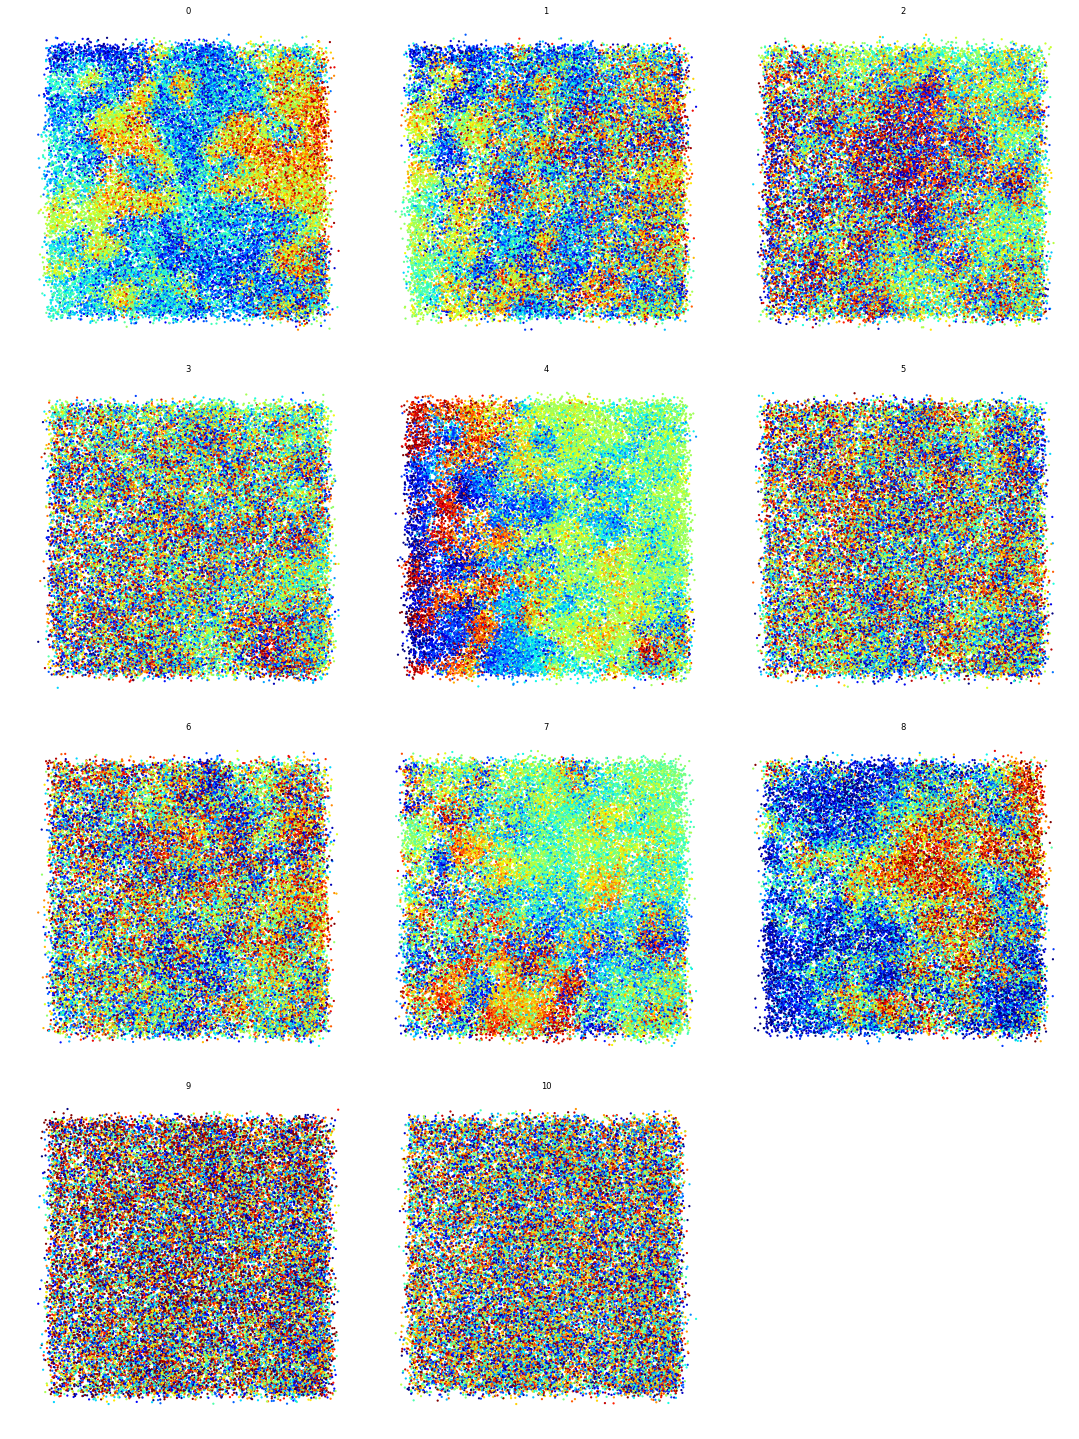

In [211]:
fig = plt.figure(figsize=(15,20))
for i in range(Design_inputs.shape[1]):
    ax = fig.add_subplot(4,3,i+1)
    col = Design_inputs_sel.values[:,i]
    mn = col.min()
    mx = col.max()
    col = (col-mn)/(mx-mn)
    x = Design_inputs_sel['x'].values[:]*1 + 1*np.random.randn(Design_inputs_sel.shape[0])
    y = Design_inputs_sel['y'].values[:]*1 + 1*np.random.randn(Design_inputs_sel.shape[0])
    sc = ax.scatter(x,y,s=5,c=col,cmap=plt.cm.jet,edgecolor='None',marker='o',alpha=1.);
    
#     sc = ax.scatter(embedding_analytics[:,0],embedding_analytics[:,1],s=5,c=col,cmap=plt.cm.jet,edgecolor='None',marker='o',alpha=1.);
    
#     plt.colorbar(sc,shrink=.5)
    plt.axis('off')
    plt.title(Design_inputs.columns[i])
    plt.tight_layout()

In [ ]:
# Just for better visualization, we take XY from SOM and add them to design inputs and we train a UMAP
import umap
embedding_analytics = umap.UMAP(n_components=2).fit_transform(Design_inputs_sel.values[:,:-2])

In [ ]:
fig = plt.figure(figsize=(25,20))
for i in range(Design_inputs.shape[1]):
    ax = fig.add_subplot(4,3,i+1)
    col = Design_inputs_sel.values[:,i]
    mn = col.min()
    mx = col.max()
    col = (col-mn)/(mx-mn)
    sc = ax.scatter(embedding_analytics[:,0],embedding_analytics[:,1],s=5,c=col,cmap=plt.cm.jet,edgecolor='None',marker='o',alpha=1.);
    
    plt.colorbar(sc,shrink=.5)
    plt.axis('off')
    plt.title(Design_inputs.columns[i])
plt.tight_layout()

# Everything based on UMAP
### not working properly

In [ ]:
ind_sel = DF_analytics['mean_LoadPaths_abs']<HOS_stat['mean_LoadPaths_abs'].loc['20%']
print (DF_analytics.shape)
X = DF_analytics.values[ind_sel].astype(float)
# X = np.concatenate((Lengths.values[:].astype(float),Coords.values[:].astype(float)),axis=1)
# X = Lengths.values[ind_sel].astype(float)
std_x = np.std(X,axis=0)
print (X.shape)
X = X[:,std_x>0]
print (X.shape)

In [ ]:
import umap
embedding_form = umap.UMAP(n_components=2).fit_transform(X)

In [ ]:
col

In [ ]:

fig = plt.figure(figsize=(25,20))
for i in range(DF_analytics.shape[1]):
    ax = fig.add_subplot(5,4,i+1)
    col = X[:,i]
    mn = col.min()
    mx = col.max()
    col = (col-mn)/(mx-mn)
    sc = ax.scatter(embedding_form[:,0],embedding_form[:,1],s=2,c=col,cmap=plt.cm.jet,edgecolor='None',marker='o',alpha=1.);
    
    plt.colorbar(sc,shrink=.5)
    plt.axis('off')
    plt.title(DF_analytics.columns[i])
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(25,20))
for i in range(Design_inputs.shape[1]):
    ax = fig.add_subplot(4,3,i+1)
    col = Design_inputs_sel.values[:,i]
    mn = col.min()
    mx = col.max()
    col = (col-mn)/(mx-mn)
    sc = ax.scatter(embedding_form[:,0],embedding_form[:,1],s=5,c=col,cmap=plt.cm.jet,edgecolor='None',marker='o',alpha=1.);
    
    plt.colorbar(sc,shrink=.5)
    plt.axis('off')
    plt.title(Design_inputs.columns[i])
plt.tight_layout()

In [ ]:
# Second SOM



###############
# For this we need a proper data set as csv
###############


import sompylib.sompy as SOM
msz10 = 50
msz11 =50


X_input_form = Design_inputs_sel.values[:].astype(float)

print (X_input_form.shape)

som_input = SOM.SOM('', X_input_form[:], mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som_input.train(n_job = 1, shared_memory = 'no',verbose='final')
som_input.compname=[Design_inputs_sel.columns.values[:]]

In [ ]:
if X.shape[1]>35:
    pass
else:
    som_input.view_map(text_size=7)

In [ ]:
# ALl the nodes
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(120,120))
outer = gridspec.GridSpec(som.mapsize[0],som.mapsize[1])
howmanyfromeachclass = 1
DF_tmp = pd.DataFrame()
for i in range(0,som.nnodes,1):
    inner = gridspec.GridSpecFromSubplotSpec(np.sqrt(howmanyfromeachclass).astype(int), np.sqrt(howmanyfromeachclass).astype(int),
                    subplot_spec=outer[i])
    
    cases = np.argwhere(bmus==i)[:,0]
    for j in range(howmanyfromeachclass):
#         ax = plt.Subplot(fig, inner[j],projection='3d')
        
#         try:
        if len(cases)>=howmanyfromeachclass:   
            ax = fig.add_subplot(inner[j], projection='3d')
            ax.view_init(45,200)
            plt.axis('off')

            ax.set_xticks([])
            ax.set_yticks([])

            
            DF_tmp['data_inds'] = cases
            DF_tmp['dists'] = dists[cases]
            data_inds = DF_tmp.sort_values('dists')['data_inds'].values[:]


            data_ind = data_inds[j]
            coords = Coords_sel[data_ind,:]
            coords = coords.reshape(72,3)
            for edg_i, ege in enumerate(EdgeList.values[:]):

                col = np.sign(Forces_sel[data_ind][edg_i])

                line_width = scaled_abs_forces_sel[data_ind][edg_i]*3.5
                ax.plot3D(coords[ege,0], coords[ege,1], coords[ege,2],'-',color=plt.cm.jet(col), linewidth=line_width, antialiased=True)

    
            
#         except:
#             pass
        
        
    if i%100==0:
            print (i)
plt.tight_layout()
# plt.tight_layout(h_pad=.0001, w_pad=.0001 )
# fig.show()
image_path = './paper/With_Karla/Images/'
fig.savefig(image_path+'SOM_'+str(X.shape[1])+'_'+str(som.mapsize[0])+'_'+str(som.mapsize[0])+'_'+str(howmanyfromeachclass)+'.png',dpi=200)
# fig.savefig('./images_us_buildings/SOM_'+str(som.mapsize[0])+'_'+str(som.mapsize[0])+'_dim'+str(X.shape[1])+'.png',dpi=100,pad_inches=0.0)
plt.close()

In [ ]:
def plot_each_node(from_n=0,to_n=100,steps=1):
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    for bmu in range(from_n,to_n,steps):
        #select a cluster
        if bmu%100==0:
            print (bmu)

        cases = np.argwhere(bmus==bmu)[:,0]    
        K = len(cases)
        if K>=16:
            #Sort within each cluster
            DF_tmp = pd.DataFrame()
            DF_tmp['data_inds'] = cases
            DF_tmp['dists'] = dists[cases]
            data_inds = DF_tmp.sort_values('dists')['data_inds'].copy().values[:]
    #         data_inds = cases
            fig = plt.figure(figsize=(25,25))
            for f in range(16):
                data_ind = data_inds[f]
                coords = Coords_sel[data_ind,:]
                coords = coords.reshape(72,3)
                ax = fig.add_subplot(4,4,f+1, projection='3d') 
                for edg_i, ege in enumerate(EdgeList.values[:]):

                    col = np.sign(Forces_sel[data_ind][edg_i])
                    line_width = scaled_abs_forces_sel[data_ind][edg_i]*8
                    ax.plot3D(coords[ege,0], coords[ege,1], coords[ege,2],'-',color=plt.cm.jet(col), linewidth=line_width, antialiased=True)
                ax.view_init(45,200)
                plt.axis('off')
                ax.set_xticks([])
                ax.set_yticks([])

            plt.tight_layout(h_pad=.0001, w_pad=.0001 )
            image_path = './paper/With_Karla/Images/'
            fig.savefig(image_path+'SOM_bmus_top/'+str(bmu)+'_SOM_'+str(X.shape[1])+'_'+str(som.mapsize[0])+'_'+str(som.mapsize[0])+'_'+'.png',dpi=200)
            plt.close()
#             del DF_tmp, data_inds, fig,ax, coords,col,line_width
#             import matplotlib.pyplot as plt

In [ ]:
plot_each_node(from_n=1200,to_n=1400,steps=1)

# Converting to Video

In [ ]:
import cv2
# import argparse

import glob
import os
import zipfile
image_path = './paper/With_Karla/Images/'
path = image_path+'SOM_bmus_top/'


all_node_names  = []
for filename in glob.glob(os.path.join(path, '*.png')):
    all_node_names.append(filename)

images = []
for i in range(len(all_node_names)):
    images.append(image_path+'SOM_bmus_top/'+str(i)+'_SOM_'+str(X.shape[1])+'_'+str(som.mapsize[0])+'_'+str(som.mapsize[0])+'_'+'.png')



In [ ]:
images

In [ ]:
import cv2
import os

# image_folder = 'images'
image_path = './paper/With_Karla/Images/'
video_name = image_path+'video.mp4'

# images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
# frame = cv2.imread(os.path.join(image_folder, images[0]))
frame = cv2.imread(images[0])
height, width, layers = frame.shape

# video = cv2.VideoWriter(video_name, -1, 20, (width,height))

fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use lower case
video = cv2.VideoWriter(video_name, fourcc, 1.0, (width, height))


print (len(images))
for image in images:
#     video.write(cv2.imread(os.path.join(image_folder, image)))
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()

In [ ]:
image_path

In [ ]:
def show_node(node_n=0):
    fig = plt.figure(figsize=(15,15))
    path = image_path+'SOM_bmus_top/'+str(node_n)+'_SOM_'+str(X.shape[1])+'_'+str(som.mapsize[0])+'_'+str(som.mapsize[0])+'_'+'.png'
    img=plt.imread(path)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
show_node(node_n=0)

In [ ]:
from ipywidgets import interact, HTML, FloatSlider
interact(show_node,node_n=(4,100,5));


# Clustering based on form
# Another SOM based on design input and form_som 

In [ ]:
# # Save one sample from each cluster
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(120,120))
# for bmu in range(som.nnodes):

#     cases = np.argwhere(bmus==bmu)
#     try:
#         coords = Coords.values[cases[0],:]
#         coords = coords.reshape(72,3)
#         ax = fig.add_subplot(som.mapsize[0],som.mapsize[0],bmu+1, projection='3d') 
#         for ege in EdgeList.values[:]:
#             ax.plot3D(coords[ege,0], coords[ege,1], coords[ege,2],'-',color=plt.cm.jet(ege[0]/72), linewidth=.7, antialiased=True)

#         ax.view_init(45,0)
#         plt.axis('off')
#     except:
#         pass
    
        
        
#     if bmu%100==0:
#         print (bmu)
    
# plt.tight_layout(h_pad=.0001, w_pad=.0001 )
# image_path = './paper/With_Karla/Images/'
# fig.savefig(image_path+'SOM_'+str(som.mapsize[0])+'_'+str(som.mapsize[0])+'.png',dpi=200)
# plt.close()


In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# bmu = 10
# cases = np.argwhere(bmus==bmu)
# fig = plt.figure(figsize=(25,25))
# which = bmu
# for kk, f in enumerate(range(25)):
#     try:
#         coords = Coords.values[cases[f],:]
#         coords = coords.reshape(72,3)
#         ax = fig.add_subplot(5,5,kk+1, projection='3d') 
#         for ege in EdgeList.values[:]:
#             ax.plot3D(coords[ege,0], coords[ege,1], coords[ege,2],'-',color=plt.cm.jet(ege[0]/72), linewidth=.7, antialiased=True)

#         ax.view_init(45,0)
#     except:
#         pass
# plt.tight_layout()
# plt.show()

# What if we train one som for inputs and one for results

In [ ]:
# path = './ML_data_2/'
fig = plt.figure(figsize=(10,10))
#select a cluster
bmu = 199
cases = np.argwhere(bmus==bmu)
cases
for f in range(36):
    try:
        case_name = all_configs_names[cases[f][0]].replace('opt','form').replace('csv','jpeg')
        img = plt.imread(case_name)
        plt.subplot(3,3,f+1)
        plt.imshow(img[40:450,:][:,50:600])
    except:
        pass

In [ ]:
# Save forms withing each cluster
path = './ML_data_2/'
for bmu in range(0,som.nnodes,1):
    
    #select a cluster
    if bmu%100==0:
        print (bmu)
    cases = np.argwhere(bmus==bmu)
    K = min(9,len(cases))
    if K>5:
#         print (len(cases))
        fig = plt.figure(figsize=(10,10))
        for f in range(K):
            case_name = all_configs_names[cases[f][0]].replace('opt','form').replace('csv','jpeg')
            img = plt.imread(case_name)
            plt.subplot(3,3,f+1)
            plt.imshow(img[40:450,:][:,50:600])
        plt.tight_layout(h_pad=.0001, w_pad=.0001 )
        fig.savefig('./images/SOM_bmus_top/SOM_'+str(som.mapsize[0])+'_'+str(som.mapsize[0])+'_'+str(bmu)+'.png',dpi=200)
        plt.close()
    

In [ ]:
# Save one sample from each cluster
from mpl_toolkits.mplot3d import Axes3D
bmu = 370
fig = plt.figure(figsize=(120,120))

for bmu in range(som.nnodes):

    cases = np.argwhere(bmus==bmu)
    try:
        case_name = all_configs_names[cases[0][0]].replace('opt','form').replace('csv','png')
        img = plt.imread(case_name)
        plt.subplot(som.mapsize[0],som.mapsize[0],bmu+1)
        plt.imshow(img[40:450,:][:,50:600])
        
        plt.axis('off')
        if bmu%100==0:
            print (bmu)
    except:
        continue
plt.tight_layout(h_pad=.0001, w_pad=.0001 )

fig.savefig('./images/SOM_'+str(som.mapsize[0])+'_'+str(som.mapsize[0])+'.png',dpi=200)
plt.close()


In [ ]:
network = pd.read_json('./ML_data_2/form_3972.json')
network.head()

In [ ]:
for i in range(network.shape[0]):
    try:
        plt.plot(network['vertex'][i]['x'],network['vertex'][i]['y'],'.b')
    except:
        pass
    

In [ ]:
network.ix[i]


In [ ]:
network['vertex'][0]['y']

In [ ]:
# Predict the variation, mean of q and also objs?
# For this we need the lis_inds

## Loading the data

### We need to standardize the data as csv (e.g. x1,y1,z1,....,xn,yn,zn)

In [ ]:
path= './CEM_28_11_Machine_Open.txt'
path = '/Volumes/UBUNTU 16_0/CEM_03_12_Machine_Rotation.csv'
# path = './2017_24_11_Machine_Rotation.txt'
DF = pd.read_csv(path,header=None,sep=',')

In [ ]:
DF.shape

In [ ]:
DF.head()

In [ ]:
ind_false = DF.ix[:,0]==False
ind_false

inds_form = range(1,1261)
form_DF = DF.ix[ind_false,inds_form]


inds_params = range(1261,DF.shape[1])
params_DF = DF.ix[ind_false,inds_params]


# form_DF = DF.ix[ind_false,9:]

# form_DF = form_DF.ix[:,:428]






# ind_false = DF.ix[:,21]==False
# ind_false
# form_DF = DF.ix[ind_false,28:]




form_DF = form_DF.ix[:,:]
form_DF.shape

In [ ]:
params_DF.head()

In [ ]:
form_DF.head()

In [ ]:
# Vals = np.zeros((form_DF.shape[0],3*form_DF.shape[1]))

# for i in range(form_DF.shape[0]):
#     for j in range(form_DF.shape[1]):
#         vv = [float(cc) for cc in form_DF.values[i,j].split(',')]
#         Vals[i,3*j:3*j+3]= vv

In [ ]:
Vals_normed  = form_DF.values[:]
for r,points in enumerate(form_DF.values[:]):
    points = points.reshape(21,20,3)
    mx = points.reshape(21*20,3).max(axis=0)
    mn = points.reshape(21*20,3).min(axis=0)
    Vals_normed[r] = ((points-mn)/(mx-mn)).flatten()

In [ ]:
Vals_normed.shape

## Form Visualization


#### As we discussed, we need a better visualization and to remove the redundant lines

In [ ]:
which = 1000

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25,25))
for kk, f in enumerate(range(which,which+36)):
    coords = Vals_normed[f,:]
    ax = fig.add_subplot(6,6,kk+1, projection='3d')    
    #Horizontal lines in each layer
    coords = coords.reshape(21,20,3)
    for i in range(0,21):        
        ax.plot3D(coords[i,:,0], coords[i,:,1], coords[i,:,2],'-',color=plt.cm.jet(i/21.), linewidth=.7, antialiased=True)
        ax.plot3D(coords[i,[0,19],0], coords[i,[0,19],1],coords[i,[0,19],2],color=plt.cm.jet(i/21.), linewidth=0.7, antialiased=True)
    ax.view_init(45,240)
    
    
    coords = coords.flatten().reshape(21*20,3)
    for i in range(20):
            ind = range(i,21*20,20)
            ax.plot3D(coords[ind,0], coords[ind,1], coords[ind,2],'-',color='gray',linewidth=.3, antialiased=True)

plt.tight_layout()
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25,25))
for kk, f in enumerate(range(which,which+36)):
#     f = 101
    coords = Vals_normed[f,:]
    ax = fig.add_subplot(6,6,kk+1)    
    #Horizontal lines in each layer
    coords = coords.reshape(21,20,3)
    for i in range(0,21):
        ax.plot(coords[i,:,0], coords[i,:,1],'.-',color=plt.cm.jet(i/21.), linewidth=.8, antialiased=True)
        ax.plot(coords[i,[0,19],0], coords[i,[0,19],1],color=plt.cm.jet(i/21.), linewidth=0.7, antialiased=True)
#         ax.plot(coords[i,10:,0], coords[i,10:,1],'.-',color=plt.cm.jet(i/21.), linewidth=.8, antialiased=True)
        plt.xlabel('x')
        plt.ylabel('y')
#         
#     ax.view_init(45,240)

plt.tight_layout()
plt.show()

In [ ]:
coords.shape

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(25,25))
# for kk, f in enumerate(range(which,which+36)):
#     coords = Vals_normed[f,:]
#     ax = fig.add_subplot(6,6,kk+1)    
#     #Horizontal lines in each layer
#     coords = coords.reshape(21,20,3)
#     for i in range(0,21):
#         ax.plot(coords[i,:,0], coords[i,:,2],'.-',color=plt.cm.jet(i/21.), linewidth=.8, antialiased=True)
#         plt.xlabel('x')
#         plt.ylabel('z')
# #         ax.plot3D(f_coords[[0,19],0], f_coords[[0,19],1], f_coords[[0,19],2],'.-b', linewidth=0.7, antialiased=True)
# #     ax.view_init(45,240)

# plt.tight_layout()
# plt.show()



# <a></a>
# <a></a>
# From this part on we can continue if we have proper data
# <a></a>
# <a></a>

## Training a SOM with form data


## Input Data
### 1- Just x,y,z coordinates for now 
### 2- As images, where xyz in each node corresponds to rgb in each pixel then we need Convolutional Nueral Nets to compare images
### 3- Maybe just some fourier analysis on these wave like patterns

In [ ]:



###############
# For this we need a proper data set as csv
###############


import sompylib.sompy as SOM
msz10 = 80
msz11 =80

indkeep = set(range(Vals_normed.shape[1])).difference(set(range(2,Vals_normed.shape[0],3)))
indkeep = list(indkeep)


X = Vals_normed[:,indkeep].astype(float)
print X.shape
som = SOM.SOM('', X[:], mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som.train(n_job = 1, shared_memory = 'no',verbose='final')

In [ ]:
bmus = som.project_data(som.data_raw)
print np.unique(bmus).shape, som.nnodes
plt.hist(bmus,bins=300);

In [ ]:
bmus = som.project_data(som.data_raw)
print np.unique(bmus).shape, som.nnodes
plt.hist(bmus,bins=300);
som.hit_map()

In [ ]:
U = som.view_U_matrix(distance2=2, row_normalized='No', show_data='Yes', contooor='Yes', blob='No', save='No', save_dir='')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
bmu = 370
fig = plt.figure(figsize=(120,120))

for bmu in range(som.nnodes):

    cases = np.argwhere(bmus==bmu)
    try:
        coords = Vals_normed[cases[0],:]
        ax = fig.add_subplot(som.mapsize[0],som.mapsize[0],bmu+1, projection='3d')    
        #Horizontal lines in each layer
        coords = coords.reshape(21,20,3)
        for i in range(0,21):        
#             ax.plot3D(coords[i,:,0], coords[i,:,1], coords[i,:,2],'-',color=plt.cm.jet(.1), linewidth=.3, antialiased=True)
#             ax.plot3D(coords[i,[0,19],0], coords[i,[0,19],1],coords[i,[0,19],2],color=plt.cm.jet(.1), linewidth=0.3, antialiased=True)
            ax.plot3D(coords[i,:,0], coords[i,:,1], coords[i,:,2],'-',color=plt.cm.jet(i/21.), linewidth=.7, antialiased=True)
            ax.plot3D(coords[i,[0,19],0], coords[i,[0,19],1],coords[i,[0,19],2],color=plt.cm.jet(i/21.), linewidth=0.7, antialiased=True)
        
#         coords = coords.flatten().reshape(21*20,3)
#         for i in range(20):
#             ind = range(i,21*20,20)
#             ax.plot3D(coords[ind,0], coords[ind,1], coords[ind,2],'-',color=plt.cm.jet(.1),linewidth=.3, antialiased=True)

        
        ax.view_init(45,240)
        plt.axis('off')
        if bmu%100==0:
            print bmu
    except:
        continue
plt.tight_layout(h_pad=.0001, w_pad=.0001 )

fig.savefig('./images/SOM_'+str(som.mapsize[0])+'_'+str(som.mapsize[0])+'.png',dpi=200)
plt.close()
 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
bmu = 370

for bmu in range(0,10,10):

    fig = plt.figure(figsize=(25,25))

    cases = np.argwhere(bmus==bmu)

#     print (len(cases))

    for f in range(36):
        try:
            coords = Vals_normed[cases[f],:]
            ax = fig.add_subplot(6,6,f+1, projection='3d')    
            #Horizontal lines in each layer
            coords = coords.reshape(21,20,3)
            coords = coords.reshape(21,20,3)
            for i in range(0,21):        
#                 ax.plot3D(coords[i,:,0], coords[i,:,1], coords[i,:,2],'-',color='gray', linewidth=.7, antialiased=True)
#                 ax.plot3D(coords[i,[0,19],0], coords[i,[0,19],1],coords[i,[0,19],2],color='gray', linewidth=0.7, antialiased=True)
                ax.plot3D(coords[i,:,0], coords[i,:,1], coords[i,:,2],'-',color=plt.cm.jet(i/21.), linewidth=.7, antialiased=True)
                ax.plot3D(coords[i,[0,19],0], coords[i,[0,19],1],coords[i,[0,19],2],color=plt.cm.jet(i/21.), linewidth=0.7, antialiased=True)
        
            coords = coords.flatten().reshape(21*20,3)
            for i in range(20):
                ind = range(i,21*20,20)
                ax.plot3D(coords[ind,0], coords[ind,1], coords[ind,2],'-',color='gray',linewidth=.3, antialiased=True)

            ax.view_init(45,240)
        except:
            continue
    plt.tight_layout()
    fig.savefig('./images/newstuff/'+str(bmu)+'.png',dpi=200)
    plt.close()
    print bmu

# A test with UMAP
https://github.com/lmcinnes/umap

In [ ]:
import umap
embedding = umap.UMAP(n_components=2).fit_transform(X)

In [ ]:
fig = plt.figure(figsize=(20,20))
# plt.plot(embedding[:,0],embedding[:,1],'.');
col =1274
plt.scatter(embedding[:,0],embedding[:,1],s=5,c=params_DF.ix[:,col].values[:].astype(float),cmap=plt.cm.jet,edgecolor='None',marker='o',alpha=1.);
plt.title()

In [ ]:
columns = params_DF.columns.values[:]
print columns.shape

std = params_DF.describe().ix['std']
std_zero = np.where(std<=0)[0]
std_zero

indNan  = np.where(params_DF.values[:]=='None')
col_nan = np.unique(indNan[1])

remove_cols =  list(std_zero)+list(col_nan)
print remove_cols
columns[remove_cols]

sel_cols = list(set(params_DF.columns.values[:]).difference(columns[remove_cols]))
print sel_cols
params_DF[sel_cols].shape

In [ ]:
fig = plt.figure(figsize=(24,24))
data = embedding.copy()
for i,col in enumerate(params_DF[sel_cols].columns[:]):    
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.scatter(data[:,0],data[:,1],s=2,c=params_DF.ix[:,col].values[:].astype(float),cmap=plt.cm.jet,edgecolor='None',marker='o',alpha=1.);
    plt.title(col)
plt.tight_layout()
fig.savefig('./images/UMAP.png',dpi=250)

In [ ]:
# from bokeh.plotting import figure, show, output_file
# from bokeh.sampledata.iris import flowers

# vals=  params_DF.ix[:,col].values[:].astype(float)
# mn = vals.min()
# mx = vals.max()
# # vals = (vals-mn)/(mx-mn)

# colors = [plt.cm.jet(val) for val in vals]

# p = figure(title = "Iris Morphology")
# p.xaxis.axis_label = 'Petal Length'
# p.yaxis.axis_label = 'Petal Width'

# p.circle(embedding[:,0], embedding[:,1],
#          color=colors, fill_alpha=1, size=5,line_color=None)

# output_file("iris.html", title="iris.py example")

# show(p)

In [ ]:
embedding3d = umap.UMAP(n_components=3).fit_transform(X)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
col =1274
fig = plt.figure(figsize=(15,15))
vals=  params_DF.ix[:,col].values[:].astype(float)
print vals.min(),vals.max()
ax = fig.add_subplot(1,1,1,projection='3d')  
ax.scatter(embedding3d[:,0],embedding3d[:,1],embedding3d[:,2],s=3,c=vals,vmin=vals.min(),vmax=vals.max(),cmap=plt.cm.jet,edgecolors=None,marker='o',alpha=1.);
ax.view_init(45,190)
# plt.axis('off')
plt.xticks([])
plt.yticks([])
ax.set_zticks([])
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
# plt.plot(embedding[:,0],embedding[:,1],'.');
col =1274
plt.scatter(embedding[:,0],embedding[:,1],s=5,c=params_DF.ix[:,col].values[:].astype(float),cmap=plt.cm.jet,edgecolor='None',marker='o',alpha=1.);
plt.title()

# Now to visualize the design parameters on the trained SOM of forms

In [ ]:
# TO BE DONE

# And also, just one SOM based on design parameters
### Unfortunately, most of these values are not consistent or useful. Some are None, some have mixed logical values and some no variations


# 1- Let's see if the input params have connections to falsification of the results

In [ ]:

inds_params_all = range(1261,DF.shape[1])

all_params_DF = DF.ix[:,inds_params_all]
all_params_DF.head()

In [ ]:
columns = all_params_DF.columns.values[:]
print columns.shape

In [ ]:
std = all_params_DF.describe().ix['std']
std_zero = np.where(std<=0)[0]
std_zero

In [ ]:
indNan  = np.where(params_DF.values[:]=='None')
col_nan = np.unique(indNan[1])

remove_cols =  list(std_zero)+list(col_nan)
print remove_cols
columns[remove_cols]

In [ ]:
sel_cols = list(set(all_params_DF.columns.values[:]).difference(columns[remove_cols]))
print sel_cols
all_params_DF[sel_cols].head()

In [ ]:



###############
# For this we need a proper data set as csv
###############


import sompylib.sompy as SOM
msz10 = 30
msz11 =30

# indkeep = set(range(Vals_normed.shape[1])).difference(set(range(2,Vals_normed.shape[0],3)))
# indkeep = list(indkeep)


# X = Vals_normed[:,indkeep].astype(float)

Y = all_params_DF[sel_cols].values[:].astype(float)

print Y.shape
som_design_params = SOM.SOM('', Y[:], mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som_design_params.train(n_job = 1, shared_memory = 'no',verbose='final')
som_design_params.compname=[sel_cols]

In [ ]:
som_design_params.view_map(text_size=7)

In [ ]:
def viewmap(som,data=None):
    
    codebook_denorm = SOM.denormalize_by(som.data_raw,som.codebook)
#     bmus = som.project_data(som.data_raw)
#     cb = []
#     for i in range(som.nnodes):
#         indbm = bmus==i
#         cb.append(np.mean(som.data_raw[indbm],axis=0))
#     codebook_denorm = np.asarray(cb)
    
    msz =  getattr(som, 'mapsize')
    dim = som.codebook.shape[1]
    no_row_in_plot = dim/6 + 1 #6 is arbitrarily selected
    if no_row_in_plot <=1:
        no_col_in_plot = dim
    else:
        no_col_in_plot = 12
    
    h = .1
    w= .1
    fig = plt.figure(figsize=(no_col_in_plot*3.0*(1+w),no_row_in_plot*3.0*(1+h)))
    for k in range(dim):
        ax = plt.subplot(no_row_in_plot,no_col_in_plot,k+1)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
#         vmn = som.data_raw[:,k].min()
#         vmx = som.data_raw[:,k].max()
        vmx = codebook_denorm[:,k].max()
        vmn = codebook_denorm[:,k].min()
        pl = ax.imshow(codebook_denorm[:,k].reshape(msz[0],msz[1])[::-1],alpha=1,cmap=plt.cm.RdYlBu_r,vmin=vmn,vmax=vmx)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
#         print som.compname[k]
        plt.title(som.compname[0][k])
        ax.axis('off')
        plt.colorbar(pl,shrink=.7)
#         ax.imshow(som.codebook[:,k].reshape(msz[0],msz[1])[::],alpha=1,cmap=plt.cm.Accent_r)
#     plt.subplots_adjust(hspace = .01,wspace=.01)
    plt.tight_layout()
#     plt.savefig("./som.png",dpi=300)
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

In [ ]:
bmus = som_design_params.project_data(som_design_params.data_raw)
print ('size of unique bmus: {} out of {}'.format(np.unique(bmus).shape[0],som_design_params.nnodes))
# plt.hist(bmus,bins=100);
xy = som_design_params.ind_to_xy(bmus)[:,:2]
xy = 2500*xy + 150*np.random.randn(xy.shape[0],xy.shape[1])

xy.shape

In [ ]:
import random
ind_row_test = random.sample(range(Y.shape[0]),1000)

In [ ]:
fig = plt.figure(figsize=(20,20))


for i in range(som_design_params.data_raw.shape[1]):
    ax = plt.subplot(5,5,i+1)
    vals = Y[:,i]
    
    
    mn = vals.min()
    mx = vals.max()
#     vals= (vals-vmn)/(vmx-vmn)
    sc = plt.scatter(xy[ind_row_test,1],xy[ind_row_test,0],c=vals[ind_row_test],s=10,edgecolor='None',marker='o',alpha=1.,vmin=mn,vmax=mx,cmap=plt.cm.RdYlBu_r);
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.axis('off')
    plt.title(str(som_design_params.compname[0][i]))
    plt.colorbar(sc,ticks=np.round(np.linspace(mn,mx,10),decimals=3),shrink=0.6)
    
    
plt.tight_layout()
    
    

# Using a classifier to detect the false/true results in the forms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X_ = Y[:,1:]
y_ = Y[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_, y_, train_size=.75)
clf = RandomForestClassifier(n_estimators=40)
clf.fit(X_train, y_train)

print(clf.feature_importances_)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
columns = params_DF.columns.values[:]
print columns.shape

In [ ]:
params_DF.head()

In [ ]:
std = params_DF.describe().ix['std']
std_zero = np.where(std<=1)[0]

In [ ]:
indlog  = np.where(params_DF.values[:]==False)
print indlog
col_log = np.unique(indlog[1])
col_log

In [ ]:
indNan  = np.where(params_DF.values[:]=='None')
col_nan = np.unique(indNan[1])

remove_cols = list(col_log)+ list(std_zero)+list(col_nan)
print remove_cols
columns[remove_cols]

In [ ]:
sel_cols = list(set(params_DF.columns.values[:]).difference(columns[remove_cols]))
print sel_cols
params_DF[sel_cols].head()

In [ ]:
params_DF[sel_cols].describe().ix['std']

In [ ]:



###############
# For this we need a proper data set as csv
###############


import sompylib.sompy as SOM
msz10 = 30
msz11 =30

# indkeep = set(range(Vals_normed.shape[1])).difference(set(range(2,Vals_normed.shape[0],3)))
# indkeep = list(indkeep)


# X = Vals_normed[:,indkeep].astype(float)

Y = params_DF[sel_cols].values[:].astype(float)

print Y.shape
som_design_params = SOM.SOM('', Y[:], mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som_design_params.train(n_job = 1, shared_memory = 'no',verbose='final')
som_design_params.compname=[sel_cols]

In [ ]:
som_design_params.view_map(text_size=7)

# Let's color the forms based on one of these parameters

In [ ]:
colors = params_DF[sel_cols].values[:]
mn = colors.min(axis=0)
mx = colors.max(axis=0)
colors = (colors-mn)/(mx-mn)
np.max(colors)
# colors = SOM.normalize(colors)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
bmu = 370
fig = plt.figure(figsize=(50,50))
sel_color =  4
for bmu in range(som.nnodes):

    cases = np.argwhere(bmus==bmu)
    try:
        coords = Vals_normed[cases[0],:]
        ax = fig.add_subplot(som.mapsize[0],som.mapsize[0],bmu+1, projection='3d')    
        #Horizontal lines in each layer
        coords = coords.reshape(21,20,3)
        for i in range(0,21):        
            ax.plot3D(coords[i,:,0], coords[i,:,1], coords[i,:,2],'-',color=plt.cm.jet(colors[cases[0],sel_color][0]), linewidth=.5, antialiased=True)
            ax.plot3D(coords[i,[0,19],0], coords[i,[0,19],1],coords[i,[0,19],2],color=plt.cm.jet(colors[cases[0],sel_color][0]), linewidth=0.5, antialiased=True)
        
        coords = coords.flatten().reshape(21*20,3)
        for i in range(20):
            ind = range(i,21*20,20)
            ax.plot3D(coords[ind,0], coords[ind,1], coords[ind,2],'-',color=plt.cm.jet(colors[cases[0],sel_color][0]),linewidth=.5, antialiased=True)

        
        ax.view_init(45,240)
        plt.axis('off')
        if bmu%100==0:
            print bmu
    except:
        continue
plt.tight_layout(h_pad=.0001, w_pad=.0001 )

fig.savefig('./images/colored_by_params/SOM_which_params_'+str(sel_cols[sel_color])+'_'+str(som.mapsize[0])+'_'+str(som.mapsize[0])+'.png',dpi=300)
plt.close()
    